In [2]:
import csv, datetime, pandas as pd

# Read data for January 3

In [3]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-03-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(3228, 12)


Finding out unique sources

In [4]:
unique_src = data.src.unique()
print(len(unique_src))

1009


Unique ip sources frequency table

In [6]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

           Unique src  Count
446     185.107.94.10    525
991      93.115.26.45    428
631   208.113.204.247     85
924      77.72.82.158     64
1001      95.215.1.37     54


In [5]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   2861
0       amun    367


Grouping by timestamp

In [6]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-02 06:51:36      1
1 2018-01-02 06:53:36      1
2 2018-01-02 06:56:17      1
3 2018-01-02 06:57:07      2
4 2018-01-02 06:58:27      1


In [7]:
time_series = data.groupby(data.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0      0    155
1      1    261
2      2    184
3      3    153
4      4    117
5      5    113
6      6    101
7      7    109
8      8    122
9      9     94
10    10    112
11    11    114
12    12     90
13    13     89
14    14    119
15    15     95
16    16     96
17    17     89
18    18    113
19    19    150
20    20    221
21    21    157
22    22    201
23    23    173


Bar chart of time stamp count

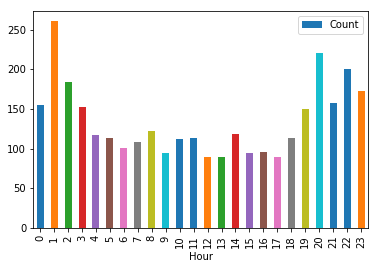

In [9]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')